In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [18]:
outputDirectory = "../results/analysis/"

if not os.path.exists(outputDirectory):
    os.makedirs(outputDirectory)

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]
filePath = "../docs/2018/final-results/biomedical-articles"
outputPath = "../results/analysis/biomedical-articles"

if not os.path.exists(outputPath):
    os.makedirs(outputPath)

In [20]:
def makeGraph(name, metric):
    ext = "trec_eval"
    if(metric == "infNDCG"):
        ext = "sampleval"

    col_names = ['metric','topic','value']
    df = pd.read_csv(join(filePath, name + "." + ext), sep=r'\t+', header=None, names=col_names, 
                     dtype={'value':float}, engine='python')
    filtered = df.loc[df['metric'].str.match(metric, case=False) & ~df['topic'].str.match("all", case=False)]

    plt.figure()
    plt.scatter(filtered['topic'], filtered['value'])
    plt.xticks(rotation='vertical')
    plt.title(metric + " " + name);
    plt.axhline(filtered['value'].mean(), color='r', label="Mean: all topics");
    plt.savefig(join(outputPath,'experiment-'+name+"-"+metric+'.pdf'))

In [21]:
def makeMetricGraph(metric):
    ext = "trec_eval"
    if(metric == "infNDCG"):
         ext = "sampleval"

    fileNames = [f for f in listdir(filePath) if isfile(join(filePath, f)) and f[-9:] == ext]

    colors=["red","blue","black","yellow","purple"]
    markers=["o","^","*","X","p"]

    plt.figure()
    plt.xticks(rotation='vertical')
    plt.title(metric)

    for file in fileNames:
        col_names = ['metric','topic','value']
        df = pd.read_csv(join(filePath, file), sep=r'\t+', header=None, names=col_names, 
                         dtype={'value':float}, engine='python')
        filtered = df.loc[df['metric'].str.match(metric, case=False) & ~df['topic'].str.match("all", case=False)]
        allTopics = df.loc[df['metric'].str.match(metric, case=False) & df['topic'].str.match("all", case=False)]['value']
        plt.scatter(filtered['topic'], filtered['value'], c=colors.pop(), alpha=0.5, marker=markers.pop(), label=file[:-10])

    plt.axhline(allTopics.mean(), color='r', label="Mean: all topics & runs");
    plt.legend(loc='best')
    plt.savefig(join(outputPath,'experiment-'+metric+'.pdf'))

In [22]:
def makeTopicGraph(metric):
    ext = "trec_eval"
    if(metric == "infNDCG"):
         ext = "sampleval"

    fileNames = [f for f in listdir(filePath) if isfile(join(filePath, f)) and f[-9:] == ext]

    plt.figure()
    plt.title(metric)

    allRuns = pd.DataFrame()
    for file in fileNames:
        col_names = ['metric','topic','value']
        df = pd.read_csv(join(filePath, file), sep=r'\t+', header=None, names=col_names, 
                         dtype={'value':float}, engine='python')
        filtered = df.loc[df['metric'].str.match(metric, case=False) & ~df['topic'].str.match("all", case=False)]
        allTopics = df.loc[df['metric'].str.match(metric, case=False) & df['topic'].str.match("all", case=False)]['value']
        # For calculating the max, mean and min per topic     
        if allRuns.empty:
            allRuns = filtered
        else:
            allRuns = allRuns.append(filtered)
    
    maxDf = allRuns.groupby('topic', as_index=False)['value'].max().astype(float).sort_values(by=['topic']);
    minDf = allRuns.groupby('topic', as_index=False)['value'].min().astype(float).sort_values(by=['topic']);
    meanDf = allRuns.groupby('topic', as_index=False)['value'].mean().astype(float).sort_values(by=['topic']);
    
    plt.axhline(allTopics.mean(), color='violet', label="Mean: all topics & runs", linewidth="1");
    plt.scatter(maxDf['topic'], maxDf['value'], c='g', label='Max', marker = "+")
    plt.scatter(meanDf['topic'], meanDf['value'], c='r', label='Mean', marker = "_")
    plt.scatter(minDf['topic'], minDf['value'], c='b', label='Min', marker = ".")    
    plt.legend(loc='best')
    plt.xticks(maxDf['topic'],rotation='vertical')
    plt.savefig(join(outputPath,'experiment-topics-'+metric+'.pdf'))

# Biomedical Articles

In [23]:
metrics=["P10 ","R-prec","infNDCG"]
runs=["hpipubcommon","hpipubbase","hpipubnone","hpipubclass","hpipubboost"]

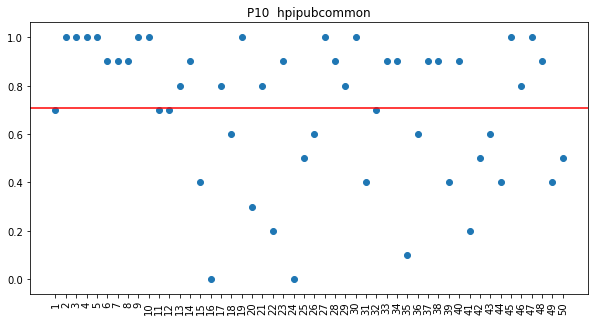

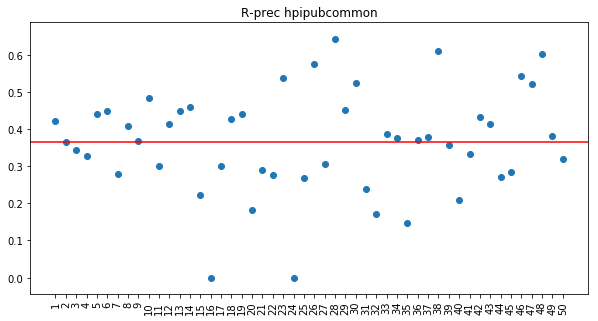

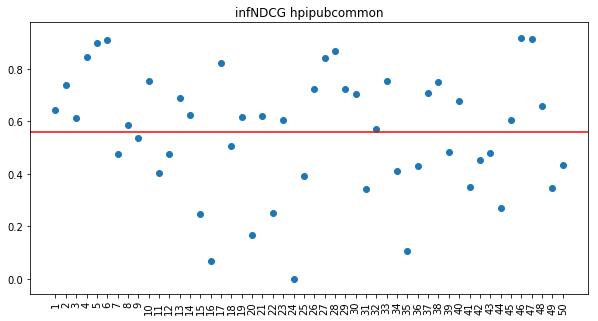

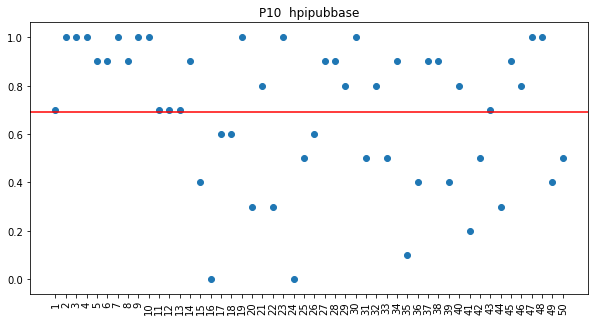

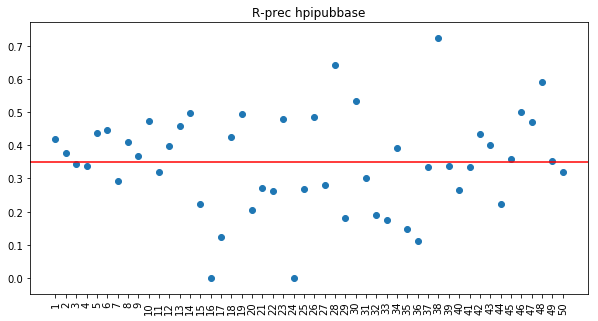

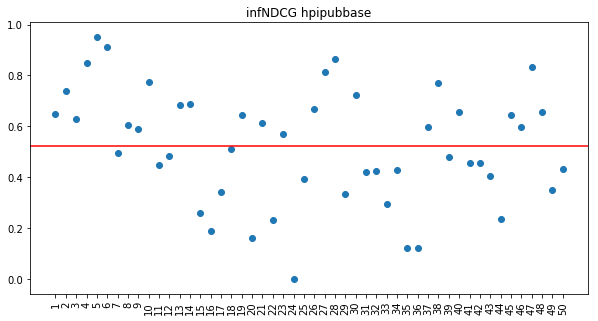

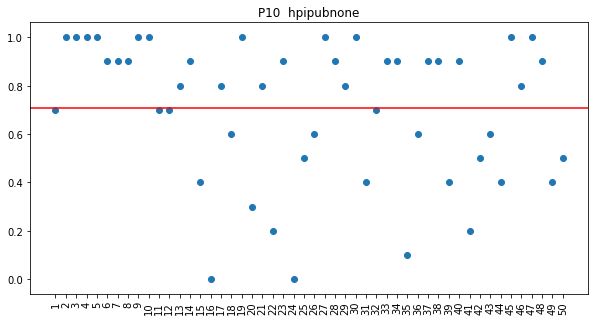

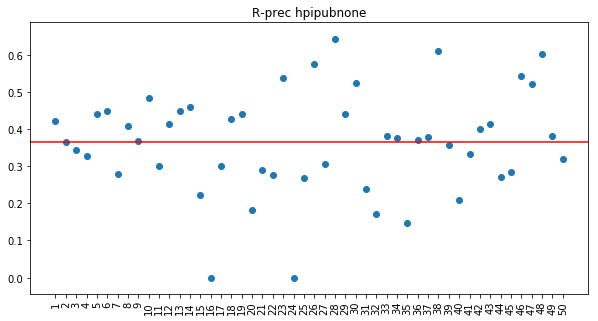

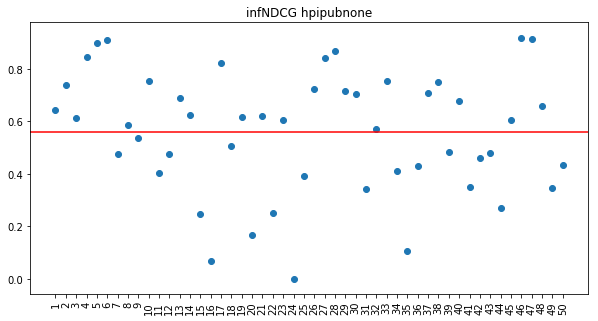

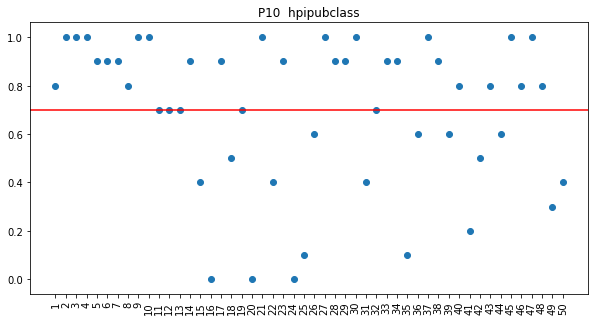

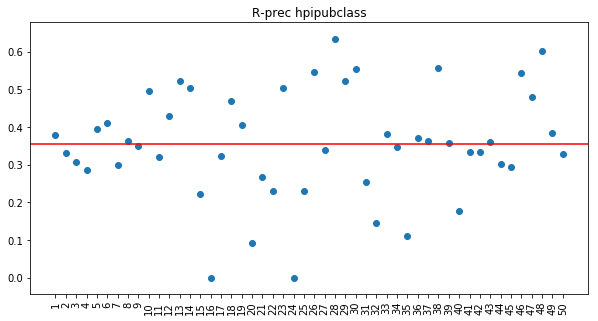

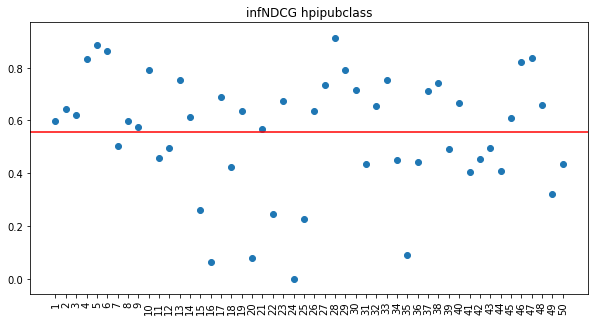

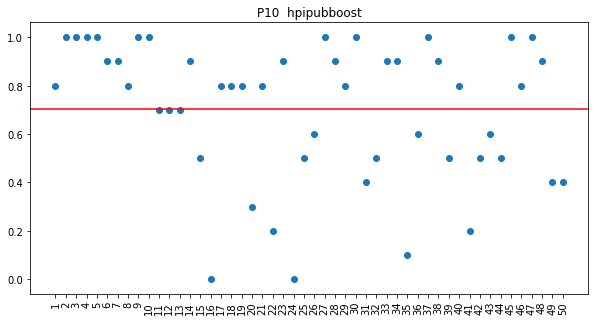

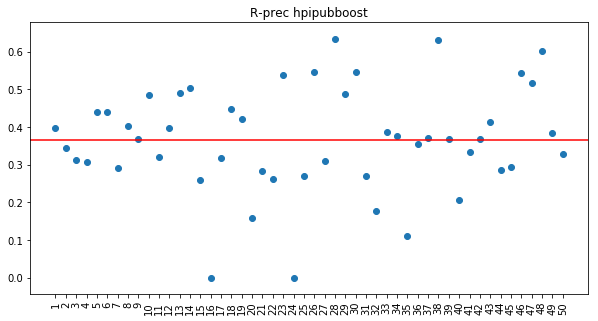

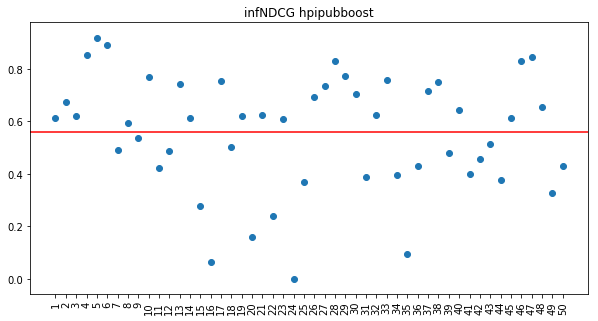

In [24]:
for run in runs:
    for metric in metrics:
        makeGraph(run, metric)

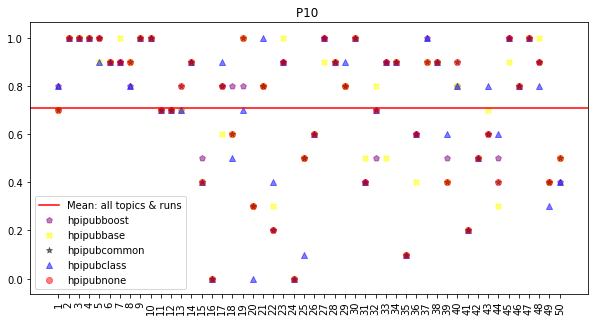

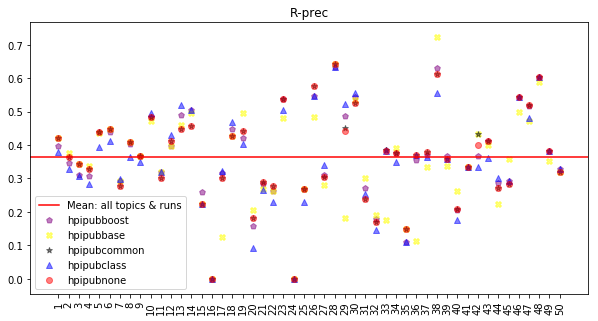

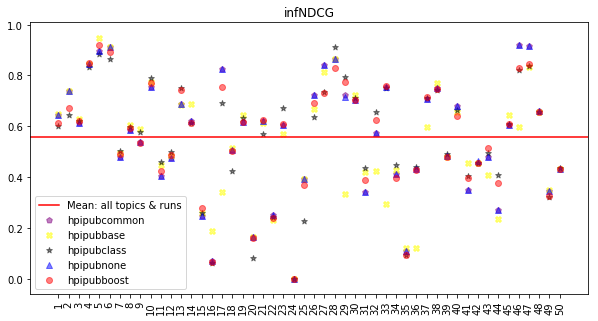

In [25]:
for metric in metrics:
    makeMetricGraph(metric)

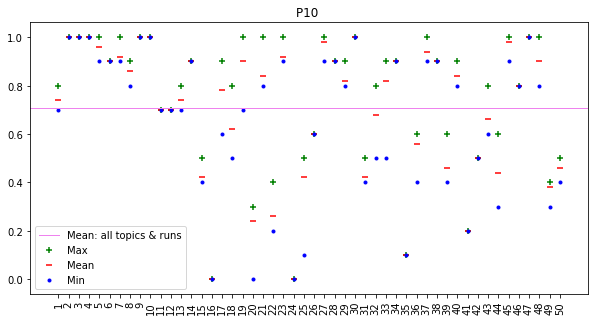

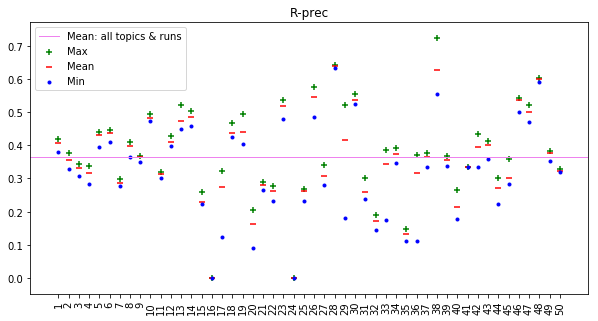

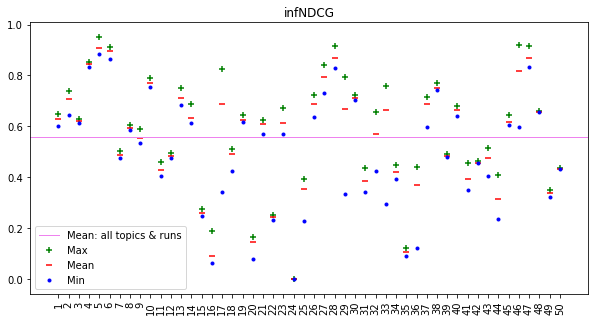

In [26]:
for metric in metrics:
    makeTopicGraph(metric)

# Clinical Trials

In [27]:
plt.rcParams['figure.figsize'] = [10, 5]
filePath = "../docs/2018/final-results/clinical-trials"
outputPath = "../results/analysis/clinical-trials"

if not os.path.exists(outputPath):
    os.makedirs(outputPath)

metrics=["P10","R-prec","infNDCG"]
runs=["hpictcommon","hpictbase","hpictall","hpictphrase","hpictboost"]

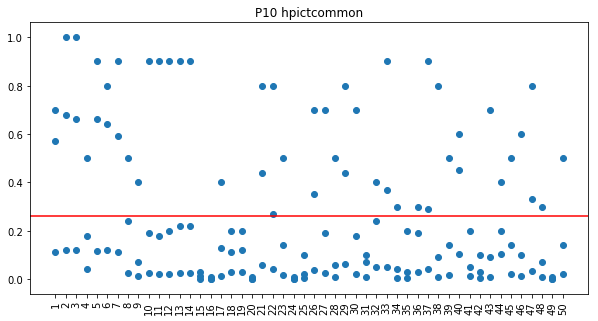

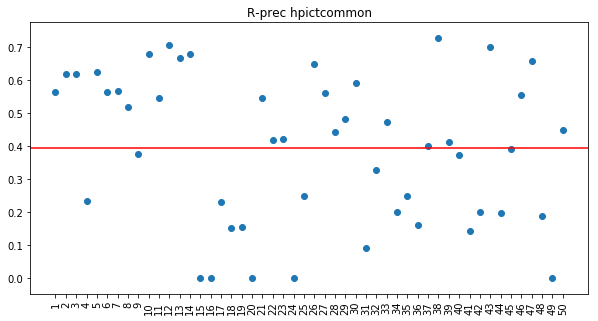

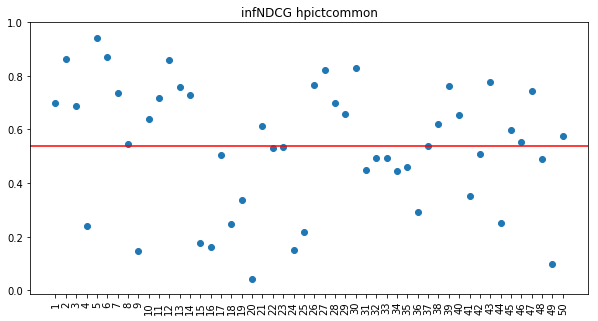

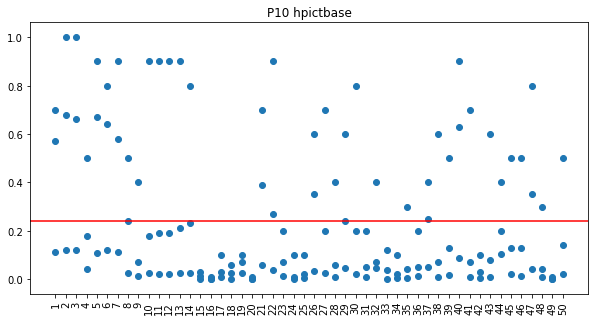

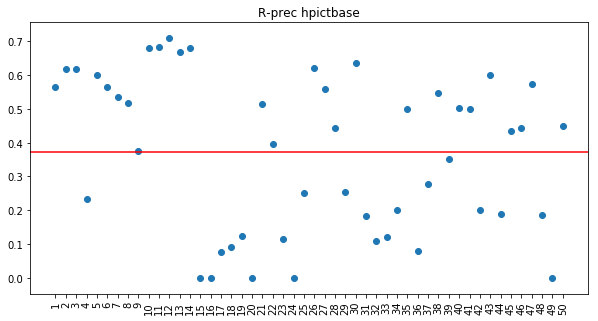

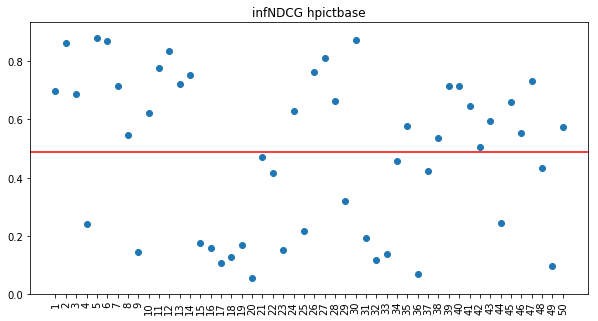

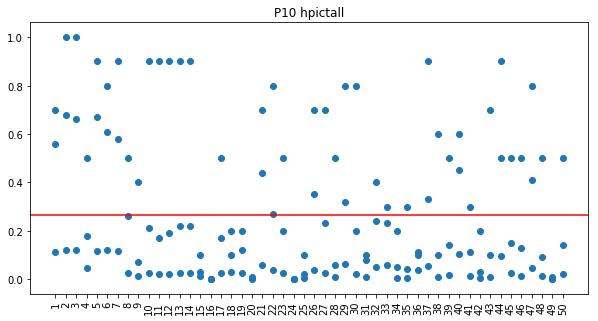

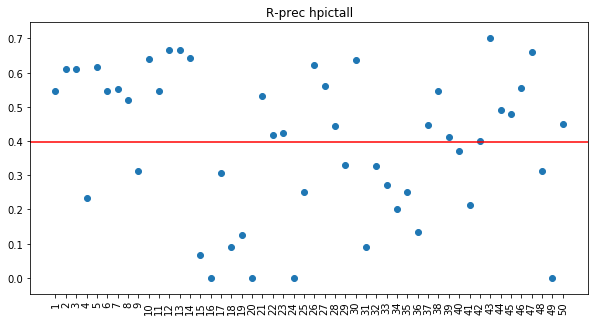

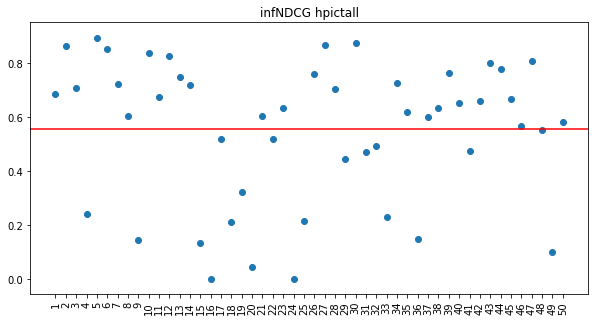

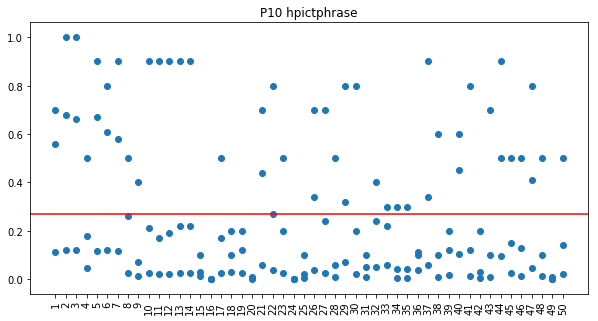

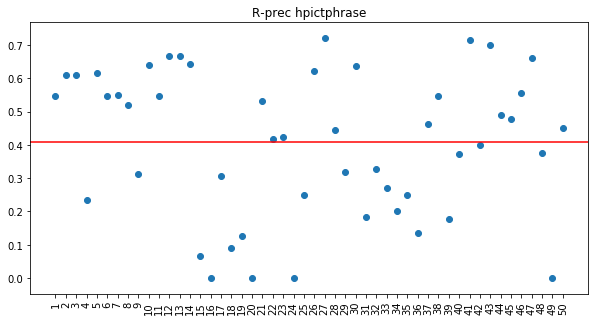

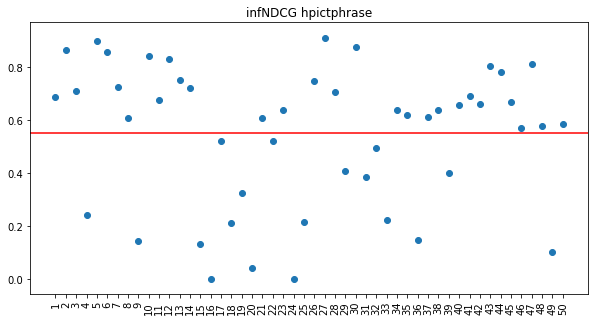

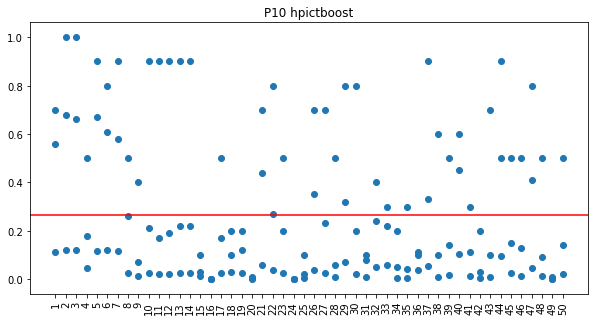

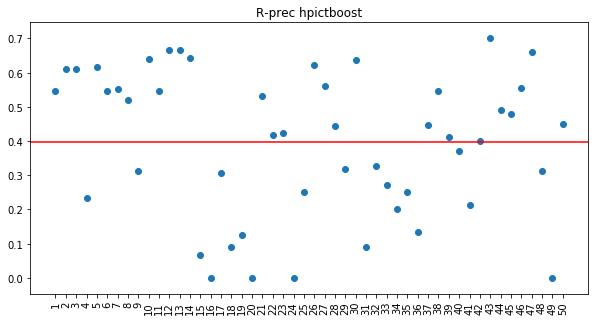

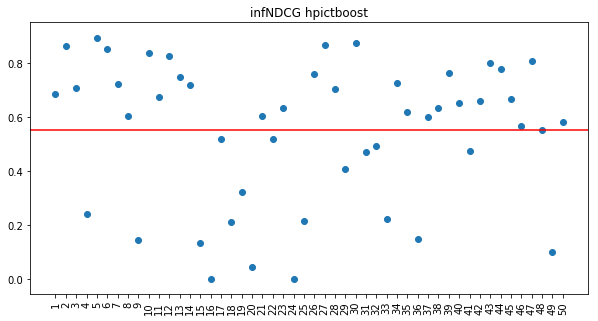

In [28]:
for run in runs:
    for metric in metrics:
        makeGraph(run, metric)

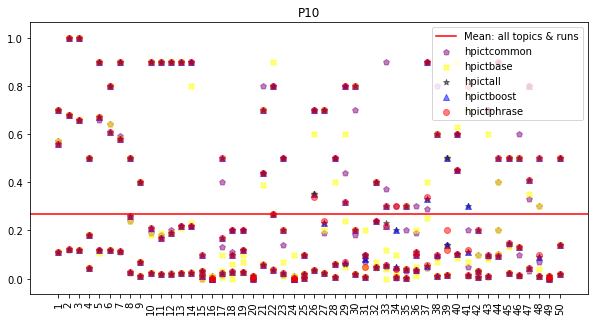

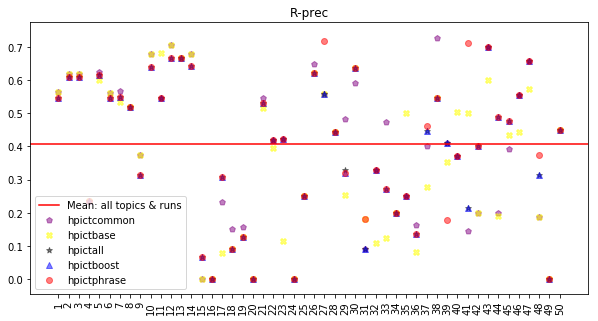

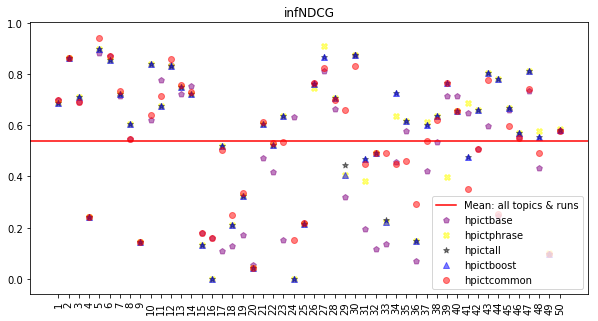

In [29]:
for metric in metrics:
    makeMetricGraph(metric)

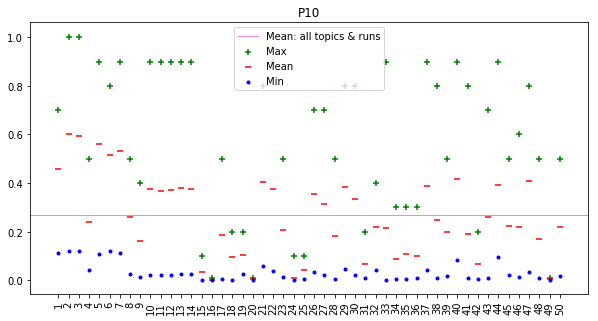

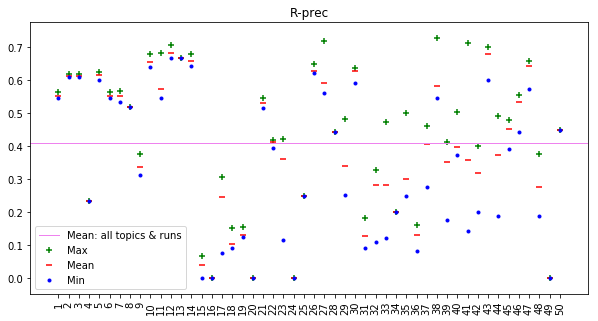

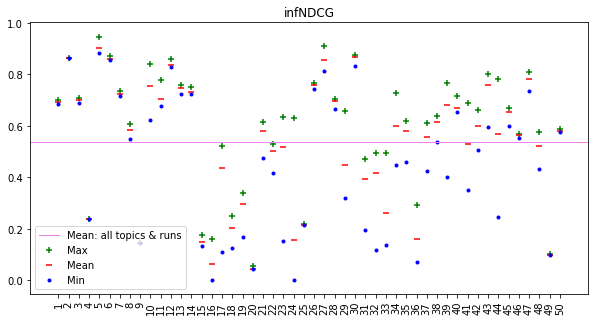

In [30]:
for metric in metrics:
    makeTopicGraph(metric)